In [49]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.keys import Keys
from datetime import date,timedelta
import time

browser = webdriver.Chrome('D:/Selenium/chromedriver_win32/chromedriver.exe')
browser.get('https://portal.vietcombank.com.vn/Personal/TG/Pages/ty-gia.aspx')

def locateTheBox():
    delay = 2
    try:
        txtbox = WebDriverWait(browser,delay).until(EC.presence_of_element_located((By.ID,'txttungay')))
    except TimeoutException:
        print ("Loading for too long")
    return txtbox

def click(dt,txtbox):
    txtbox.click()
    txtbox.clear()
    txtbox.send_keys(dt)
    txtbox.send_keys(Keys.TAB)

#Generates dates
def dateRange(date1,date2):
    diff = int((date2-date1).days)
    for n in range(diff+1):
        yield date1 + timedelta(n)
        
def dateRangeGenerator(date1,date2):
    dateEntries = list()
    for yieldedDt in dateRange(date1,date2):
        dateEntries.append(yieldedDt.strftime("%d/%m/%Y"))
    return dateEntries

startDate = date(2020,6,1)
endDate = date(2020,7,31)
list_clean_rates = list()
eachRow = list()
for dt in dateRangeGenerator(startDate,endDate):
    box = locateTheBox()
    click(dt,box)
    time.sleep(1)
    try:
        tbody = browser.find_element_by_css_selector('#ctl00_Content_ExrateView >tbody')
    except:
        print("failed")
    
    rows = tbody.find_elements_by_css_selector('tr')
    
    tblData = rows[2].find_elements_by_css_selector('td')
    
    for i in range(len(tblData)):
        if tblData[1].text == 'AUD':
            rate = tblData[4].text.replace(',','')
            list_clean_rates.append(rate)
            break
    eachRow.append([dt,rate])


In [55]:
import csv

fields = ['date','rate']  
with open('data/exchange_rate.aud.06_2020.07_2020.csv','w') as fp:
    csvwriter = csv.writer(fp)
    csvwriter.writerow(fields)
    csvwriter.writerows(eachRow)

In [13]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/exchange_rate.aud.06_2020.07_2020.csv')
rate = df['rate'].values[5:-15]
mins = np.minimum.accumulate(rate)
print(rate)
print(mins)
max_benefit = max(rate - mins)
print(max_benefit)

ex_rates = df['rate'].values[5:-15].tolist()
mins = np.minimum.accumulate(ex_rates)
print(max(ex_rates-mins))
%run main.py

[16530.95 16530.95 16504.94 16311.7  16438.86 16337.46 16073.27 16073.27
 16073.27 16087.43 16357.59 16266.9  16193.87 16158.31 16158.31 16158.31
 16104.08 16311.62 16365.8  16160.89 16212.63 16212.63 16212.63 16216.21
 16116.   16250.41 16285.75 16304.6  16304.6  16304.6  16417.67 16462.41
 16335.22 16450.63 16332.91 16332.91 16332.91 16354.1  16318.79 16457.66
 16464.76]
[16530.95 16530.95 16504.94 16311.7  16311.7  16311.7  16073.27 16073.27
 16073.27 16073.27 16073.27 16073.27 16073.27 16073.27 16073.27 16073.27
 16073.27 16073.27 16073.27 16073.27 16073.27 16073.27 16073.27 16073.27
 16073.27 16073.27 16073.27 16073.27 16073.27 16073.27 16073.27 16073.27
 16073.27 16073.27 16073.27 16073.27 16073.27 16073.27 16073.27 16073.27
 16073.27]
391.48999999999796
391.48999999999796
After many complicate calculations ...
Max profit we can get is 391.48999999999796


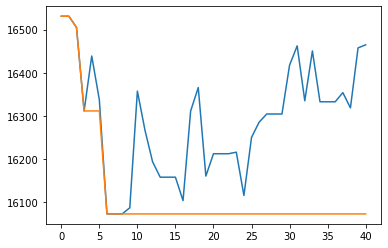

In [24]:
import matplotlib.pyplot as plt
plt.plot(rate)
plt.plot(mins)

In [17]:
# max_benefit = -10000
# for i in range(rate.shape[0]-1):
#     price_buy = rate[i]
#     for j in range(i+1,rate.shape[0]):
#         price_sell = rate[j]
#         benefit = price_sell - price_buy
#         if benefit > max_benefit:
#             max_benefit = benefit
            
# print (max_benefit)

391.48999999999796
